In [4]:
import pandas as pd
import numpy as np
import json
import os
from datetime import datetime
from matplotlib import pyplot as plt
import seaborn as sns

plt.rc('figure', dpi=150)

In [7]:
EXPERIMENTS_PATH = '../logs/experiments/'
experiment_files = [e for e in os.listdir(EXPERIMENTS_PATH) if 'experiment' in e]
experiments = []
for experiment in experiment_files:
    with open(f'{EXPERIMENTS_PATH}/{experiment}', 'rb') as f:
        try:
            _json = eval(json.load(f))
            _json['name'] = experiment
            if experiment != experiment:
                print(_json)
            experiments.append(_json)
        except:
            print(f'Problem loading file {experiment}')
            
experiments = pd.DataFrame(experiments)
experiments['datetime'] = experiments['name'].apply(lambda x: datetime.fromtimestamp(int(x.split('_')[1].split('.')[0])))
time_of_interest = datetime(2019, 6, 15, 21)
experiments = experiments.loc[experiments['datetime'] >= time_of_interest]
experiments = experiments.set_index('datetime')
columns_to_mean = ['loss', 'precision_positives', 'precision_negatives', 'recall_positives', 'recall_negatives']
for col in columns_to_mean:
    experiments[f'{col}_mean'] = experiments[col].apply(np.mean)
    experiments[f'val_{col}_mean'] = experiments[f'val_{col}'].apply(np.mean)
    
spaces = pd.DataFrame(experiments['space'].tolist(), index=experiments.index)
experiments = experiments.join(spaces)
experiments['class_weight'] = experiments['class_weight'].apply(lambda x: x[1])
experiments['n_layers'] = experiments['convolutional_layers'].apply(len)
experiments['dropout'] = experiments['convolutional_layers'].apply(lambda x: x[0]['dropout'] if 'dropout' in x[0].keys() else np.nan)
experiments['filters_first_layer'] = experiments['convolutional_layers'].apply(lambda x: x[0]['filters'])
experiments['n_filters'] = experiments['convolutional_layers'].apply(lambda x: sum(layer['filters'] for layer in x))
experiments = experiments.dropna(subset=['log', 'precision_positives_mean'], how='all')
metrics = [m for m in experiments if 'mean' in m]
print(experiments.shape)
experiments.head()

(7, 60)


,accuracy,false_negatives,false_positives,features,log,loss,model,name,negatives,num_batches_test,...,class_weight,convolutional_layers,dense_units,epochs,layer_type,learning_rate,n_layers,dropout,filters_first_layer,n_filters
datetime,,,,,,,,,,,,,,,,,,,,,
2019-06-19 15:52:46,"[0.7582577, 0.76897556, 0.76897556, 0.76897556...","[6.7869253, 6.9304614, 6.9304614, 6.9304614, 6...","[0.4650593, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",aleppo.p,NaN,"[0.4098227923820967, 0.2729510776922293, 0.272...",<class 'damage.models.cnn.CNN'>,experiment_1560952366.json,"[23.068363, 23.068363, 23.068363, 23.068363, 2...",1.0,...,0.655,"[{'dropout': 0.8, 'activation': 'softmax', 'ke...",32,12,vgg,NaN,4,0.800000,32,480
2019-06-19 00:25:31,"[0.7628709, 0.7648404, 0.7963491, 0.80399555, ...","[3.0239205, 2.497393, 2.8144896, 2.5370014, 2....","[3.6393158, 4.1105013, 2.9080224, 2.9510155, 3...",aleppo.p,NaN,"[0.3630695631823411, 0.23785007189481053, 0.21...",<class 'damage.models.cnn.CNN'>,experiment_1560896731.json,"[21.58434, 21.58434, 21.58434, 21.568789, 21.4...",1.0,...,0.655,"[{'kernel_size': [3, 3], 'activation': 'relu',...",64,12,cnn,NaN,4,0.644444,16,240
2019-06-19 01:56:49,"[0.7528718, 0.76897556, 0.77070415, 0.76955855...","[6.717093, 6.9304614, 6.8631773, 6.9282074, 6....","[0.6964618, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",aleppo.p,NaN,"[0.4643619357051549, 0.2729759104017036, 0.272...",<class 'damage.models.cnn.CNN'>,experiment_1560902209.json,"[23.068363, 23.068363, 23.068363, 23.136724, 2...",1.0,...,0.655,"[{'dropout': 0.8, 'activation': 'softmax', 'ke...",32,13,cnn,NaN,2,0.800000,64,192
2019-06-19 14:03:34,"[0.7496684, 0.7700583, 0.7700583, 0.7700583, 0...","[6.202433, 6.4152946, 6.4152946, 6.4152946, 6....","[0.80680573, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",aleppo.p,NaN,"[0.463342721047413, 0.2723484186442166, 0.2723...",<class 'damage.models.cnn.CNN'>,experiment_1560945814.json,"[21.568972, 21.484358, 21.484358, 21.484358, 2...",1.0,...,0.655,"[{'kernel_size': [7, 7], 'activation': 'softma...",32,8,vgg,NaN,2,0.566667,128,384
2019-06-18 21:40:12,"[0.7740058, 0.7991068, 0.81166565, 0.81801045,...","[3.0971773, 2.7436538, 2.9975007, 2.819465, 2....","[3.697834, 3.282907, 2.6523082, 2.6400077, 2.5...",aleppo.p,NaN,"[0.3911893451572173, 0.21375575672992922, 0.20...",<class 'damage.models.cnn.CNN'>,experiment_1560886812.json,"[23.136724, 23.068363, 23.068363, 23.068363, 2...",1.0,...,0.655,"[{'dropout': 0.7222222222222222, 'activation':...",64,6,vgg,NaN,2,0.722222,64,192


In [9]:
best_performing_precision_metrics = experiments.loc[experiments['val_precision_positives_mean'].idxmax(), metrics]
print(best_performing_precision_metrics)
best_performing_precision_space = experiments.loc[experiments['val_precision_positives_mean'].idxmax(), 'space']
best_performing_precision_space

loss_mean                        0.216442
val_loss_mean                    0.142233
precision_positives_mean         0.587509
val_precision_positives_mean     0.208333
precision_negatives_mean           0.8837
val_precision_negatives_mean     0.988635
recall_positives_mean            0.614495
val_recall_positives_mean       0.0555556
recall_negatives_mean            0.862363
val_recall_negatives_mean        0.997807
Name: 2019-06-19 00:25:31, dtype: object


{'batch_size': 28,
 'convolutional_layers': [{'kernel_size': [3, 3],
   'activation': 'relu',
   'dropout': 0.6444444444444445,
   'pool_size': [2, 2],
   'filters': 16},
  {'kernel_size': [3, 3],
   'activation': 'relu',
   'dropout': 0.6444444444444445,
   'pool_size': [2, 2],
   'filters': 32},
  {'kernel_size': [3, 3],
   'activation': 'relu',
   'dropout': 0.6444444444444445,
   'pool_size': [2, 2],
   'filters': 64},
  {'kernel_size': [3, 3],
   'activation': 'relu',
   'dropout': 0.6444444444444445,
   'pool_size': [2, 2],
   'filters': 128}],
 'epochs': 12,
 'class_weight': {0: 0.345, 1: 0.655},
 'dense_units': 64,
 'layer_type': 'cnn'}

In [11]:
best_performing_recall_metrics = experiments.loc[experiments['val_precision_negatives_mean'].idxmax(), metrics]
print(best_performing_recall_metrics)
best_performing_recall_space = experiments.loc[experiments['val_precision_negatives_mean'].idxmax(), 'space']
best_performing_recall_space

loss_mean                        0.235912
val_loss_mean                      1.1884
precision_positives_mean         0.588727
val_precision_positives_mean    0.0972985
precision_negatives_mean         0.877005
val_precision_negatives_mean      0.99445
recall_positives_mean            0.585543
val_recall_positives_mean        0.555556
recall_negatives_mean            0.871883
val_recall_negatives_mean        0.801957
Name: 2019-06-18 21:40:12, dtype: object


{'class_weight': {0: 0.345, 1: 0.655},
 'batch_size': 30,
 'layer_type': 'vgg',
 'convolutional_layers': [{'dropout': 0.7222222222222222,
   'activation': 'relu',
   'kernel_size': [5, 5],
   'filters': 64,
   'pool_size': [4, 4]},
  {'dropout': 0.7222222222222222,
   'activation': 'relu',
   'kernel_size': [5, 5],
   'filters': 128,
   'pool_size': [4, 4]}],
 'dense_units': 64,
 'epochs': 6}

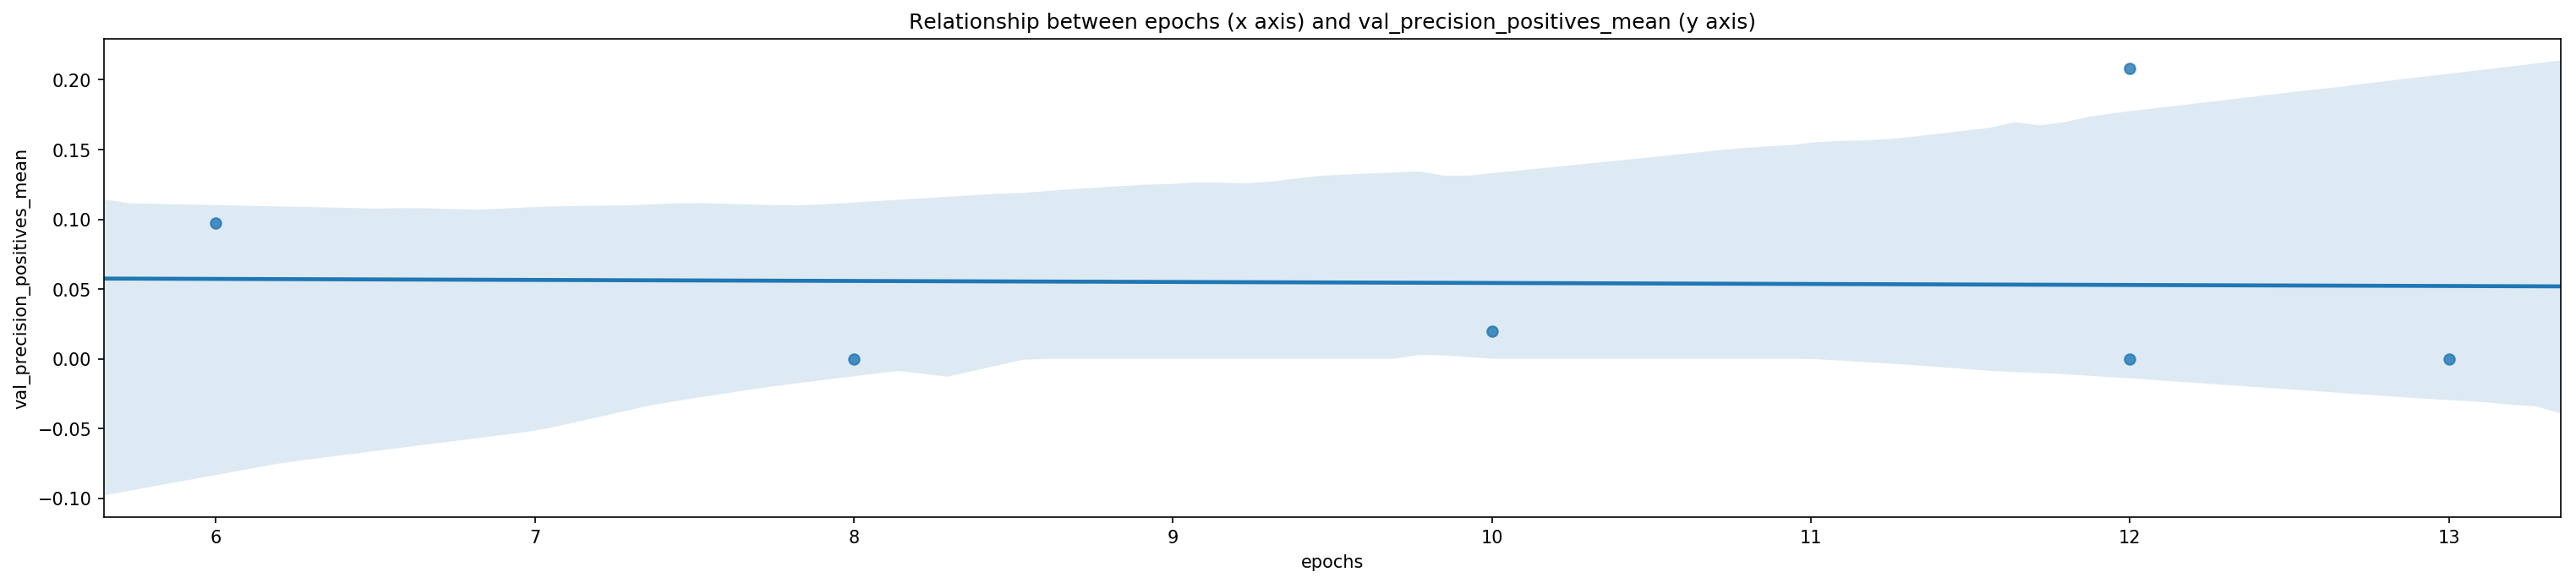

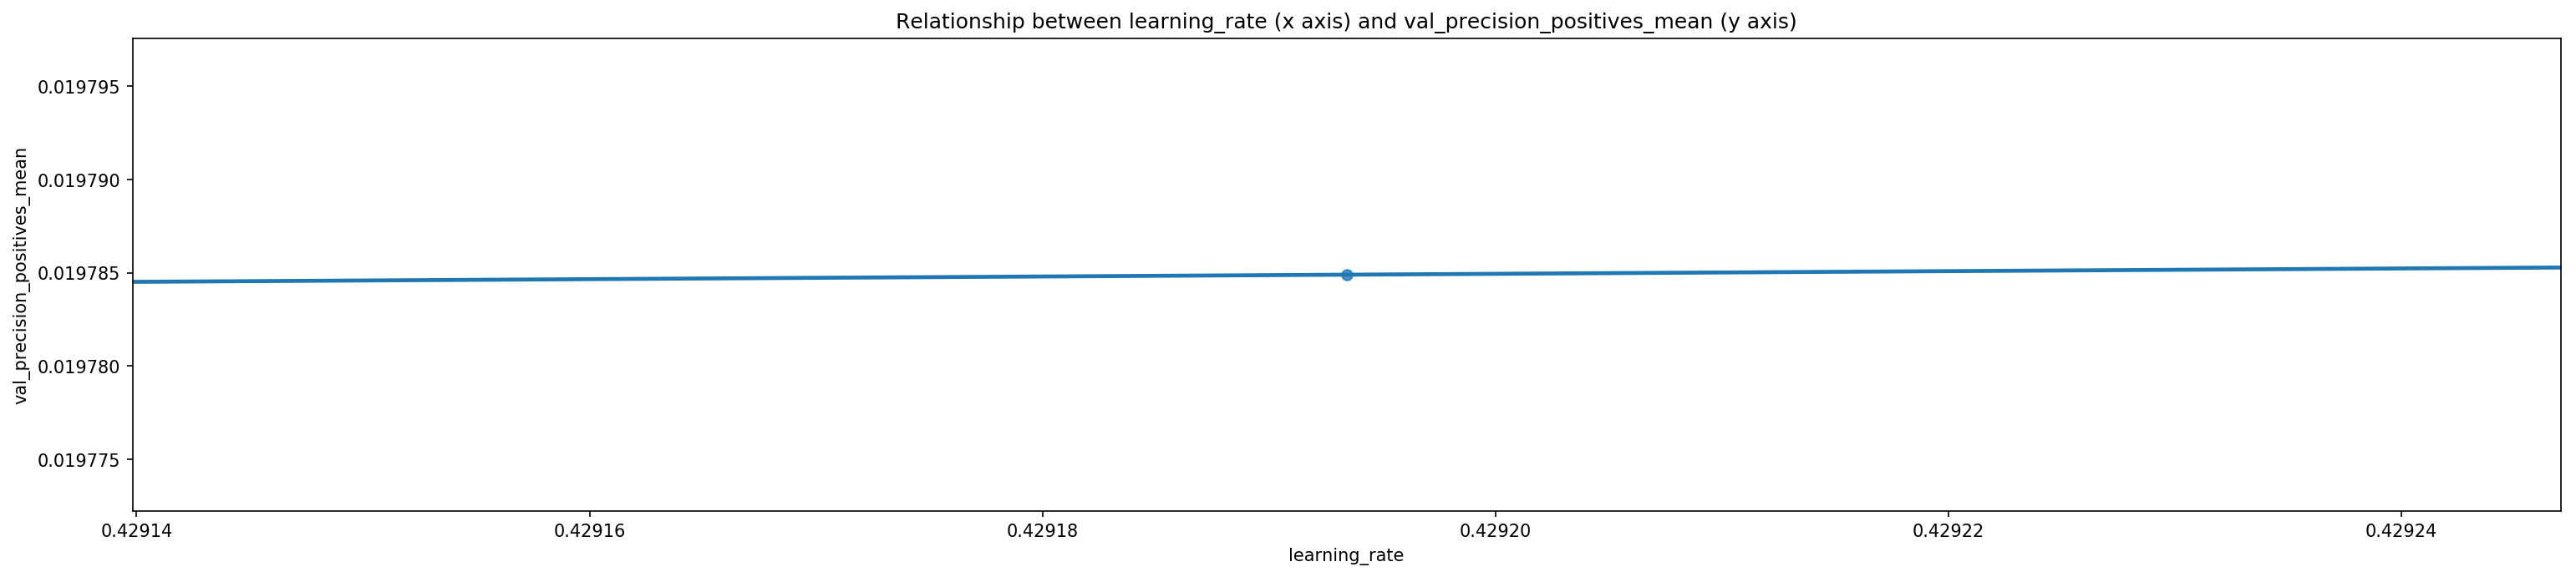

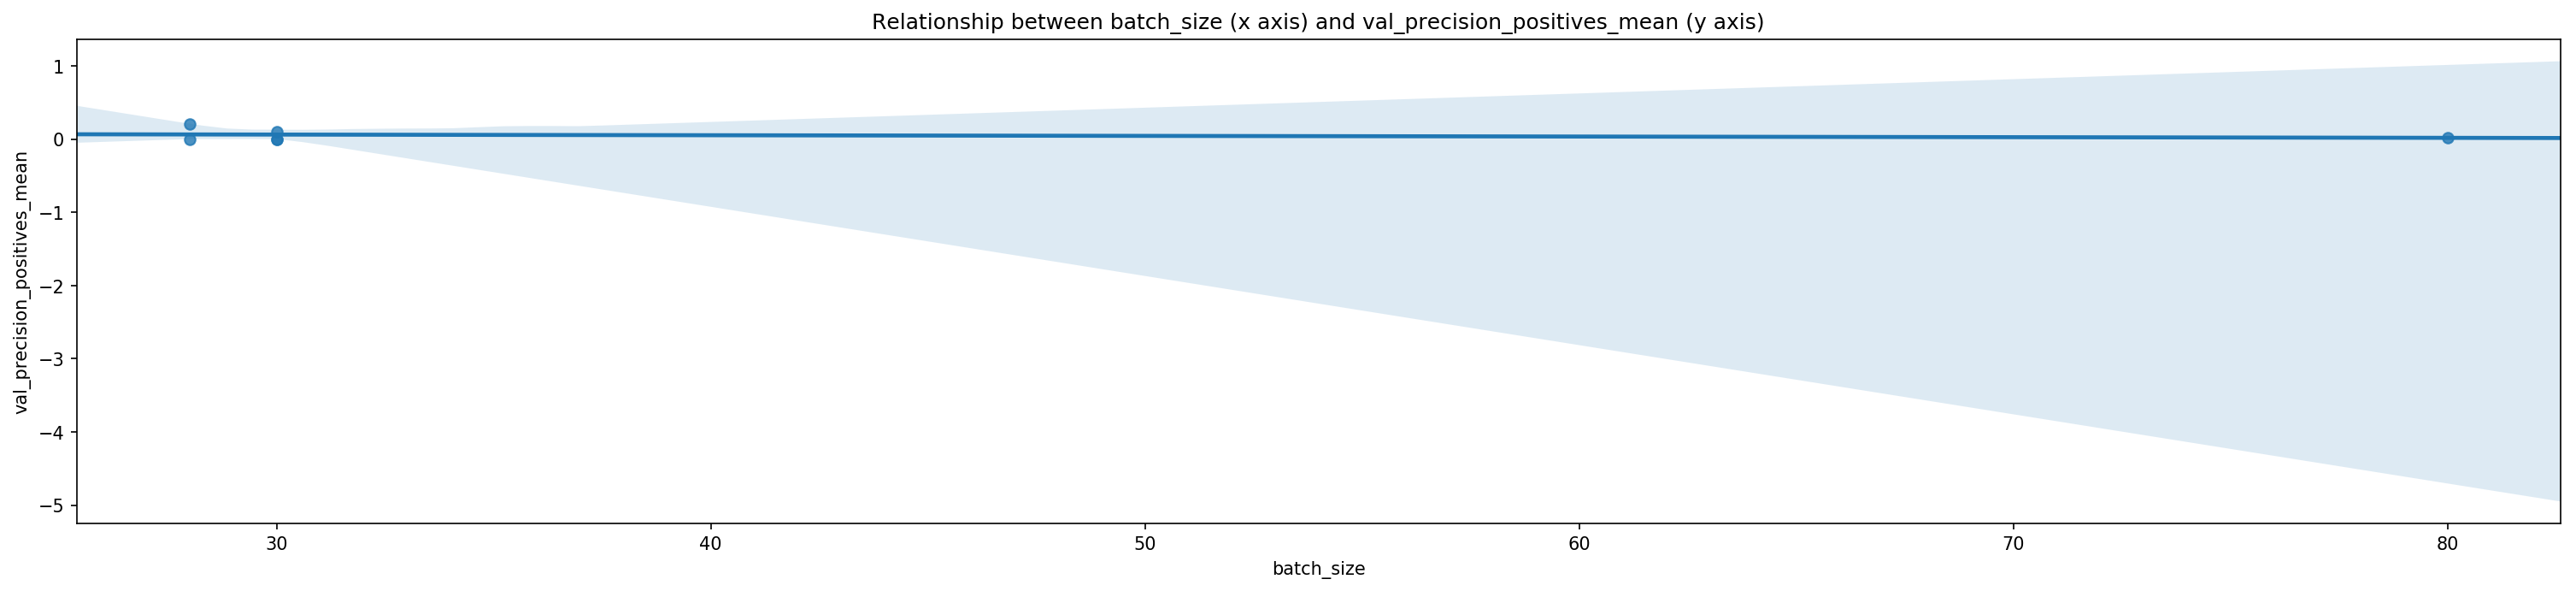

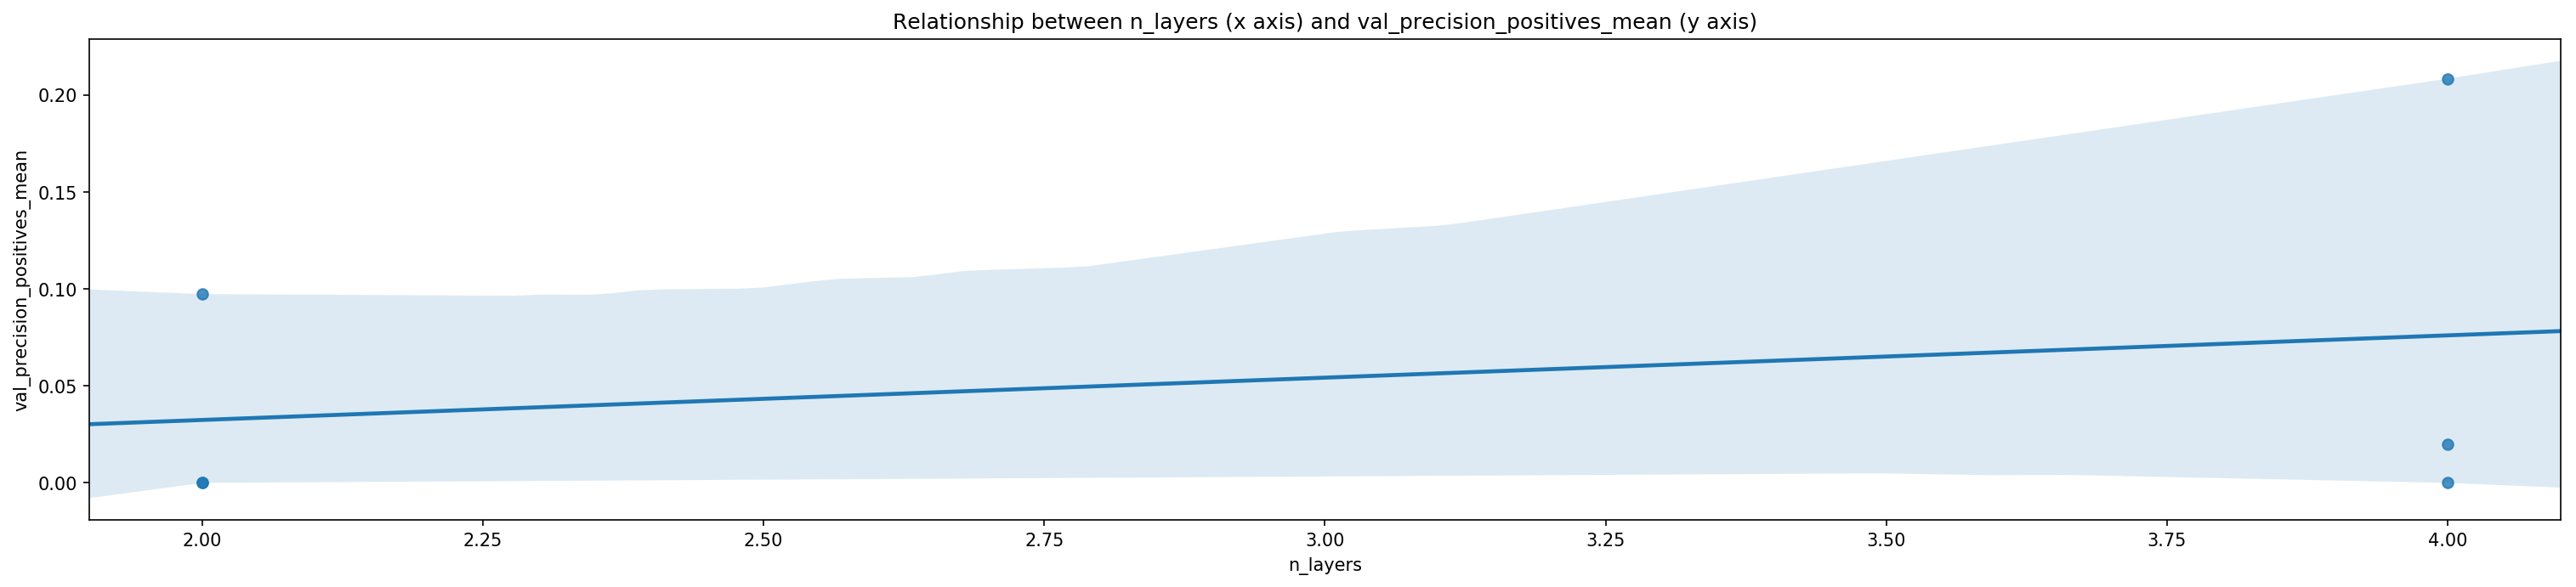

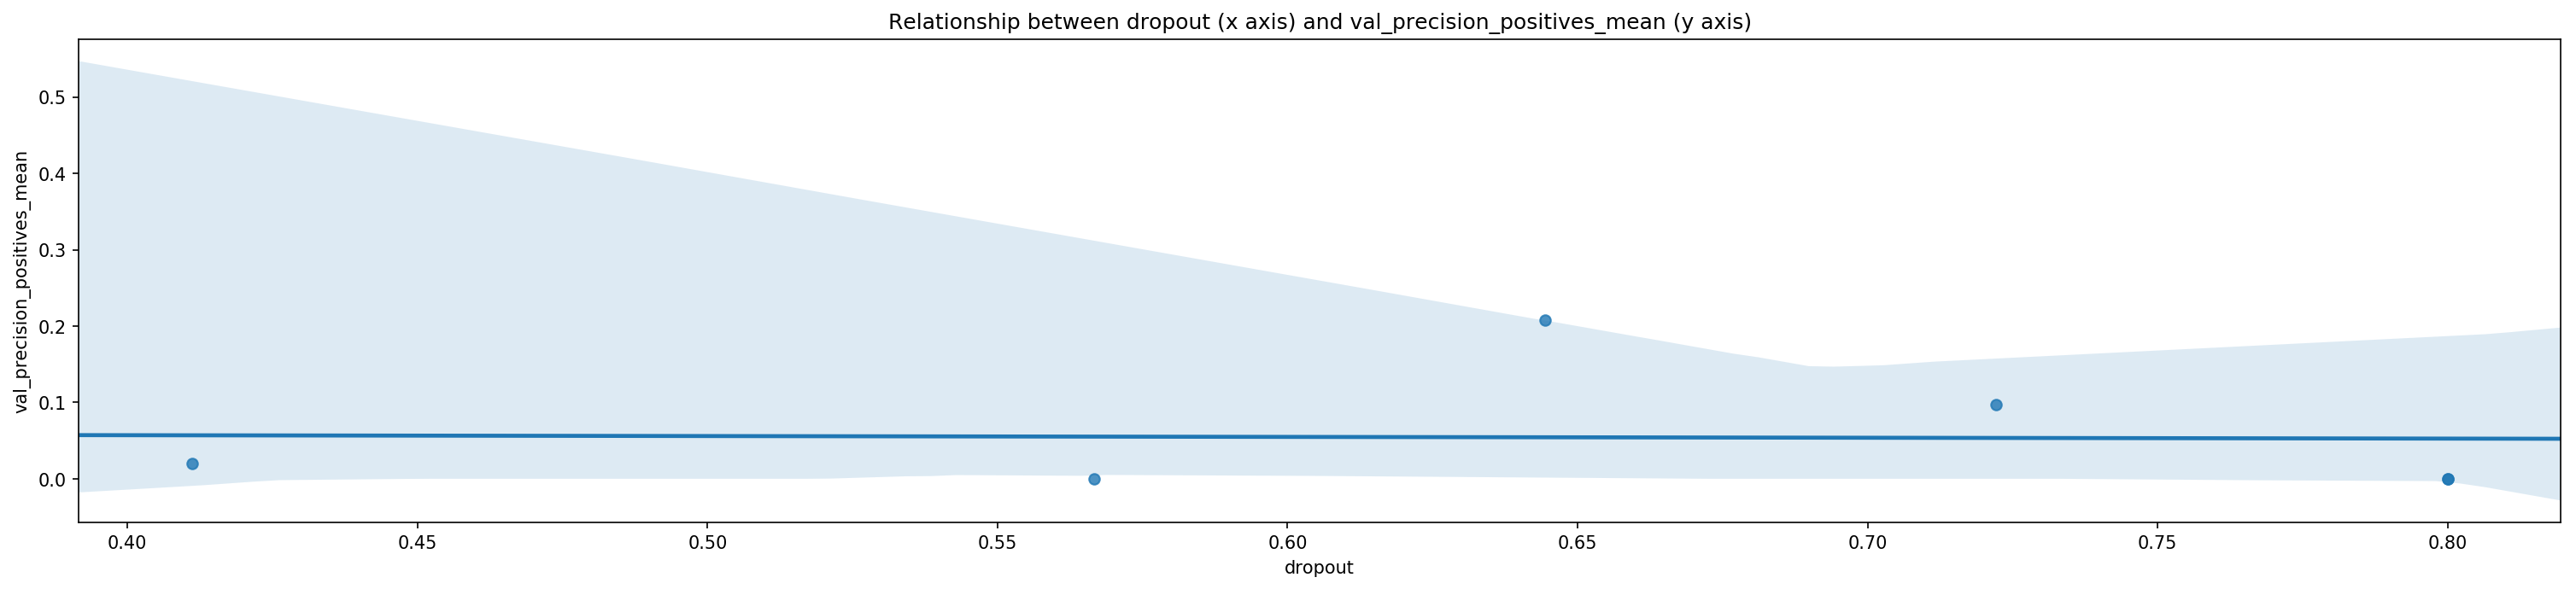

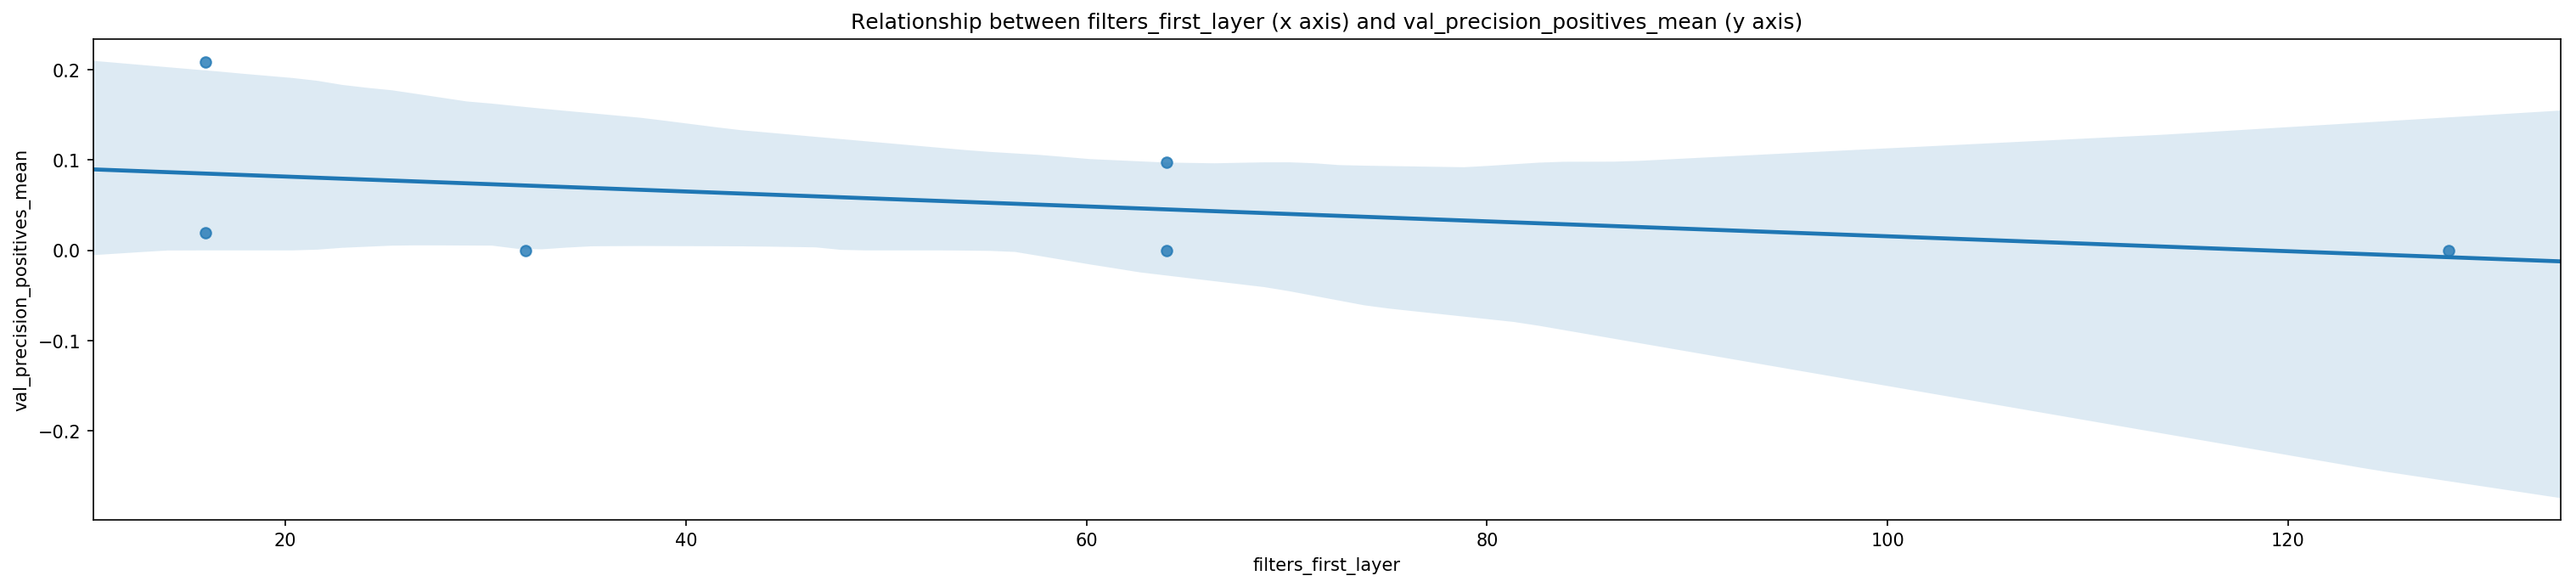

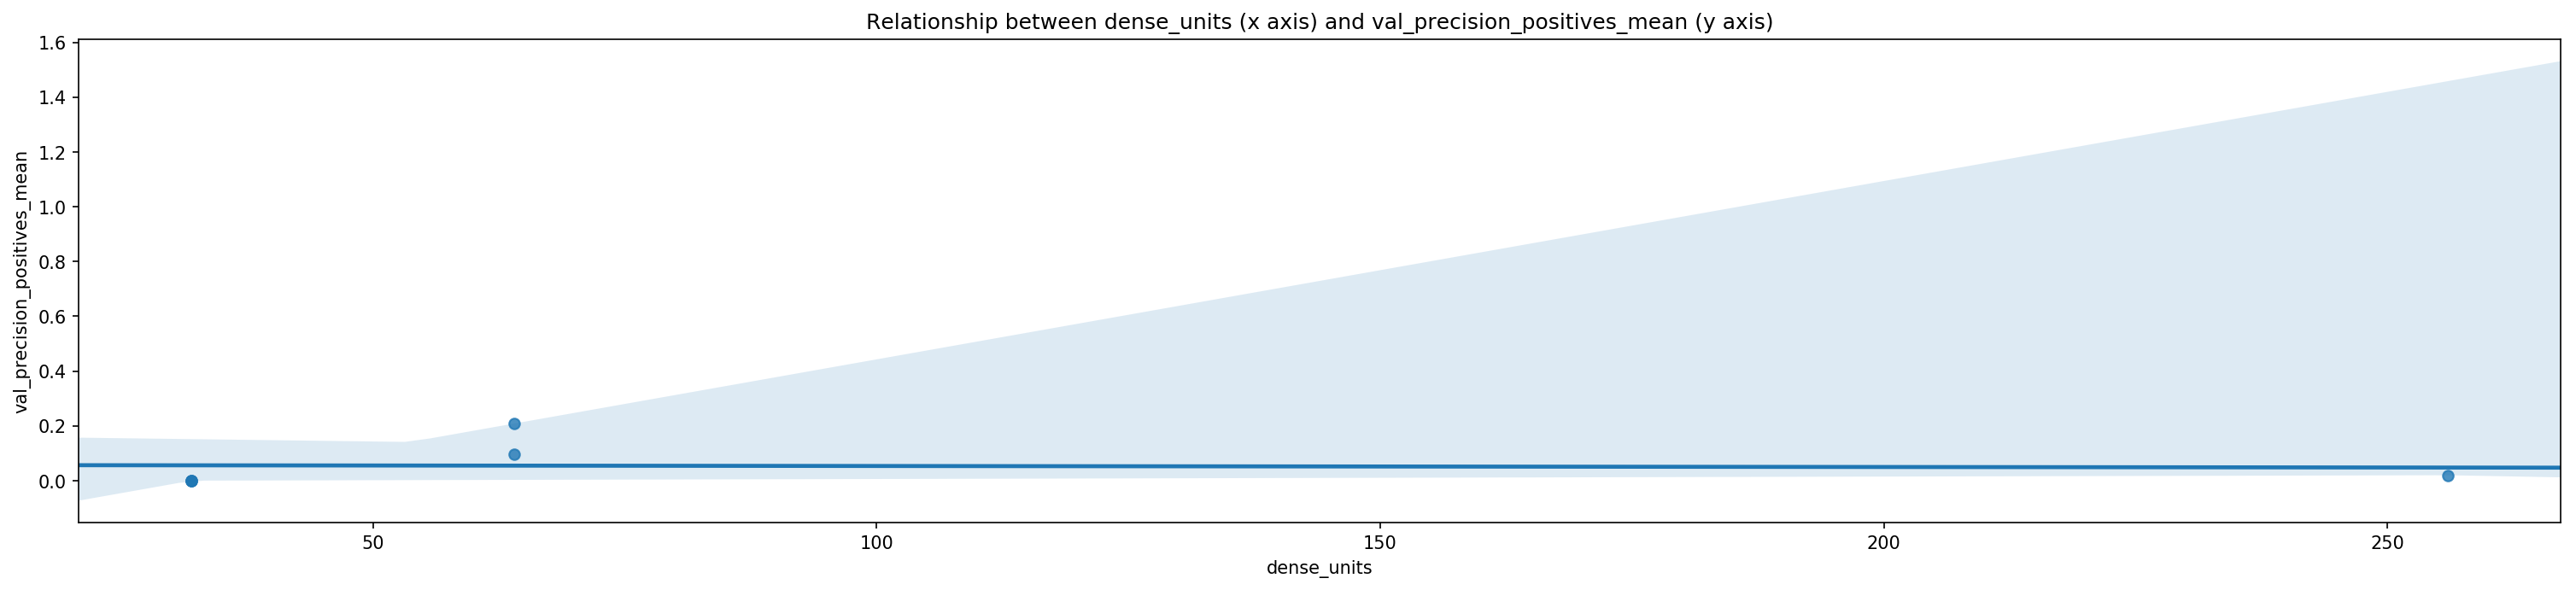

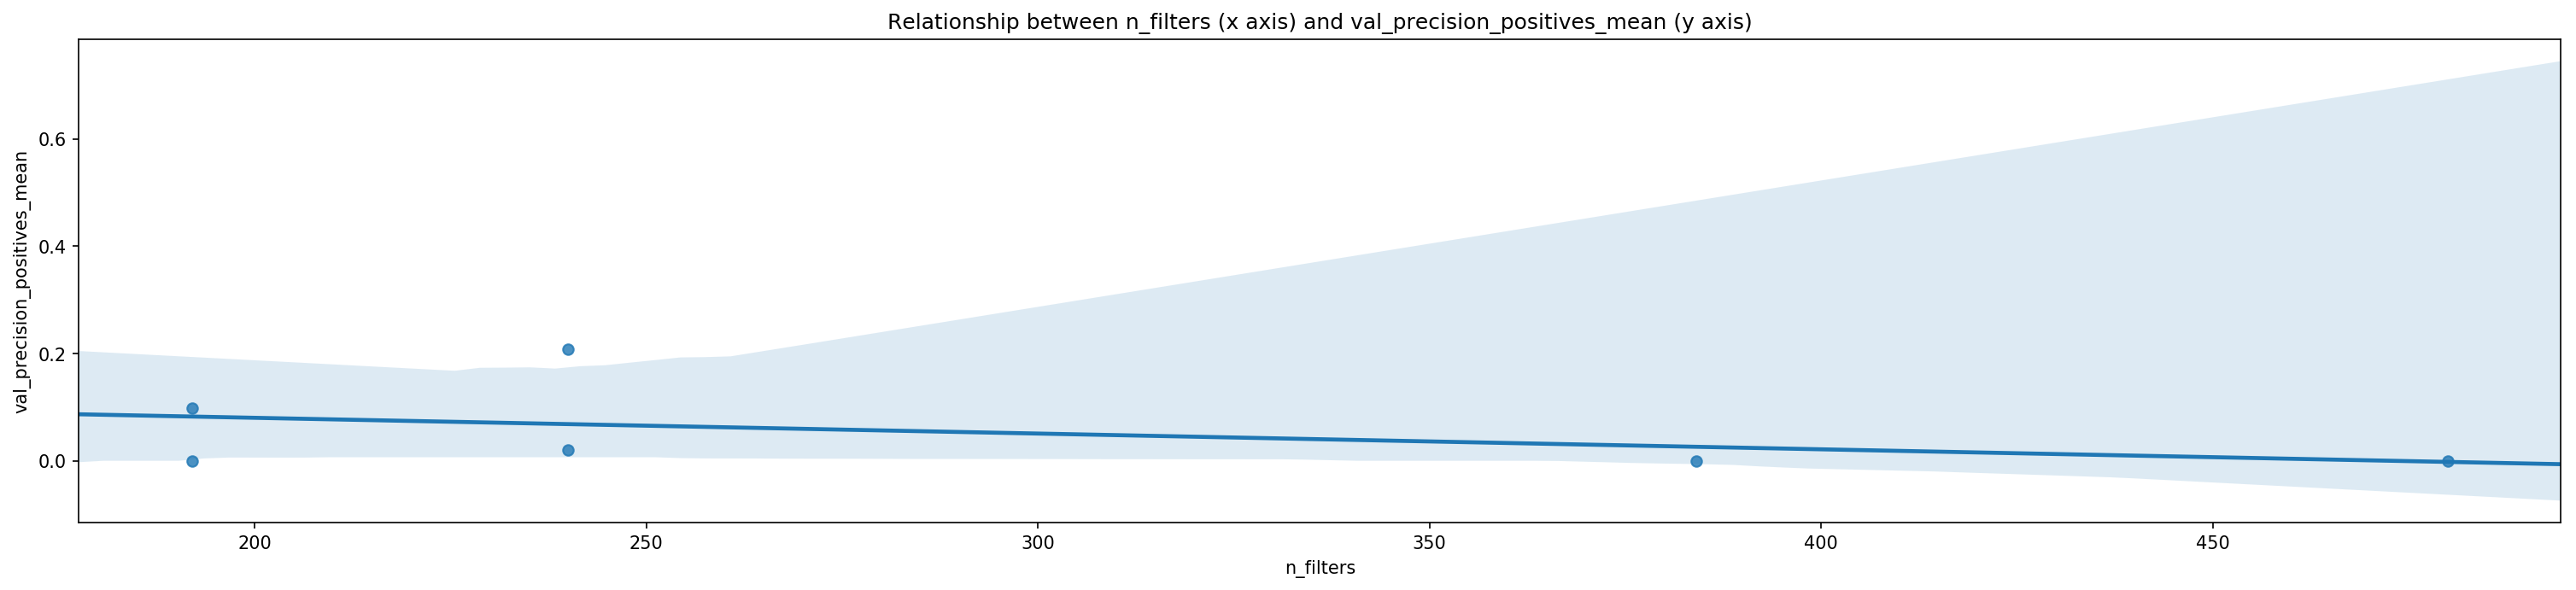

In [13]:
parameters = ['epochs', 'learning_rate', 'batch_size', 'n_layers', 'dropout', 'filters_first_layer', 'dense_units', 'n_filters']
metric = 'val_precision_positives_mean'
for parameter in parameters:
    fig, ax = plt.subplots(figsize=(25, 5))
    _experiments = experiments[[parameter, metric]].dropna()
    sns.regplot(_experiments[parameter], _experiments[metric])
    ax.set_title(f'Relationship between {parameter} (x axis) and {metric} (y axis)')

layer_type
cnn    2
vgg    4
Name: val_precision_positives_mean, dtype: int64


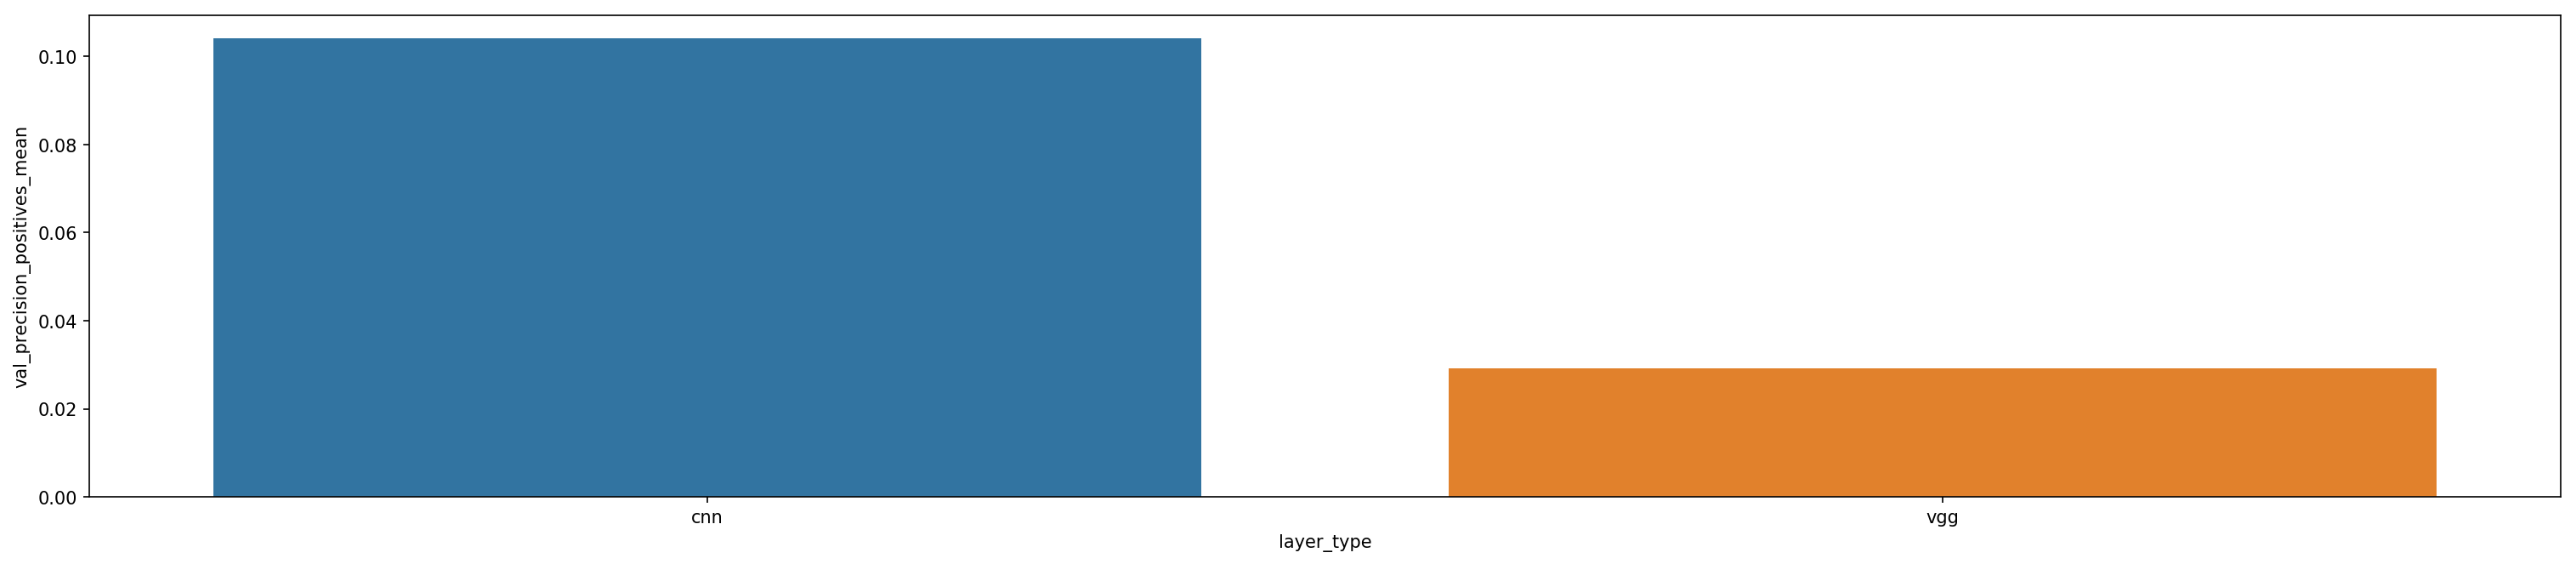

In [15]:
fig, ax = plt.subplots(figsize=(25, 5))
print(experiments.groupby('layer_type')[metric].count())
sns.barplot(x=experiments.groupby('layer_type')[metric].mean().index, y=experiments.groupby('layer_type')[metric].mean(), ax=ax)

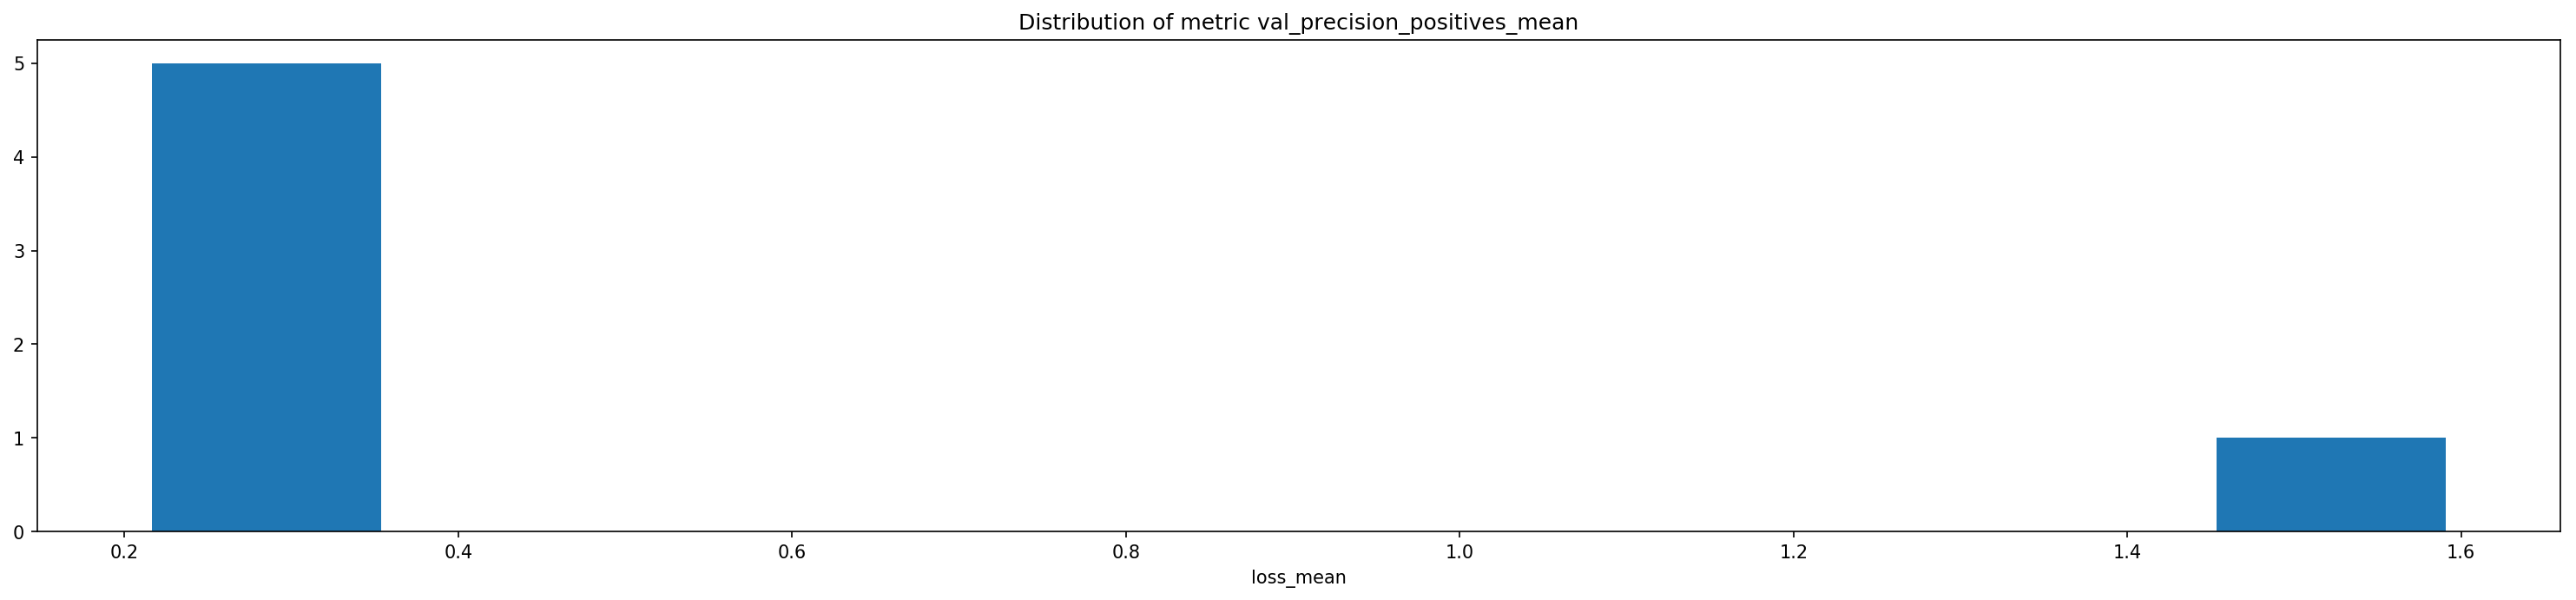

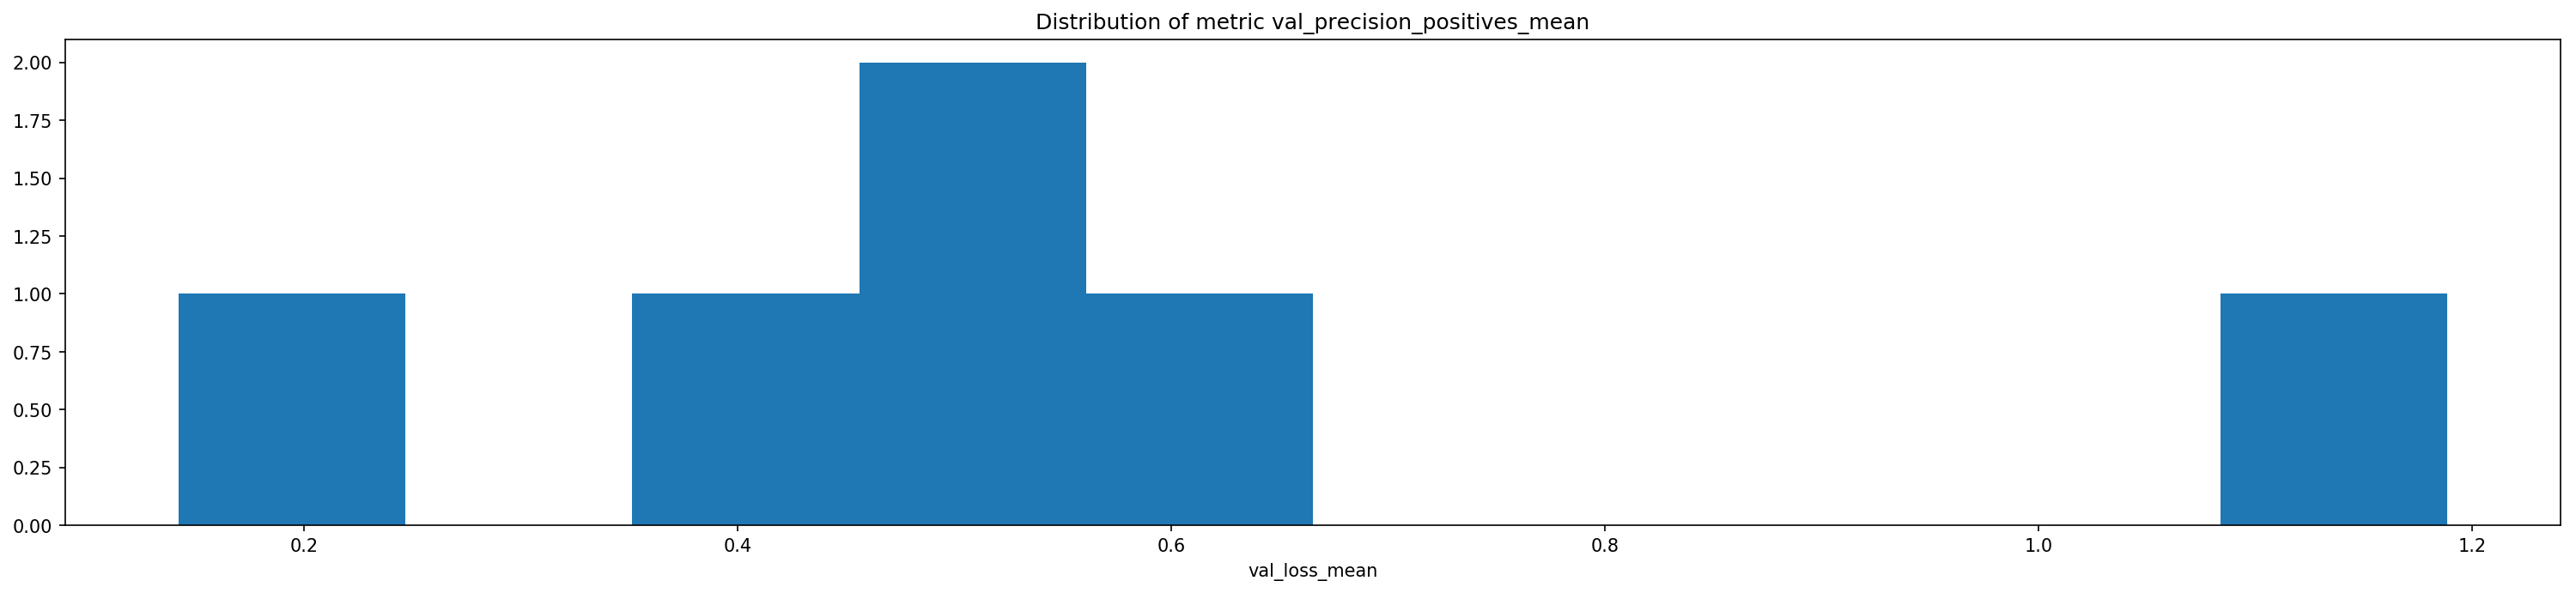

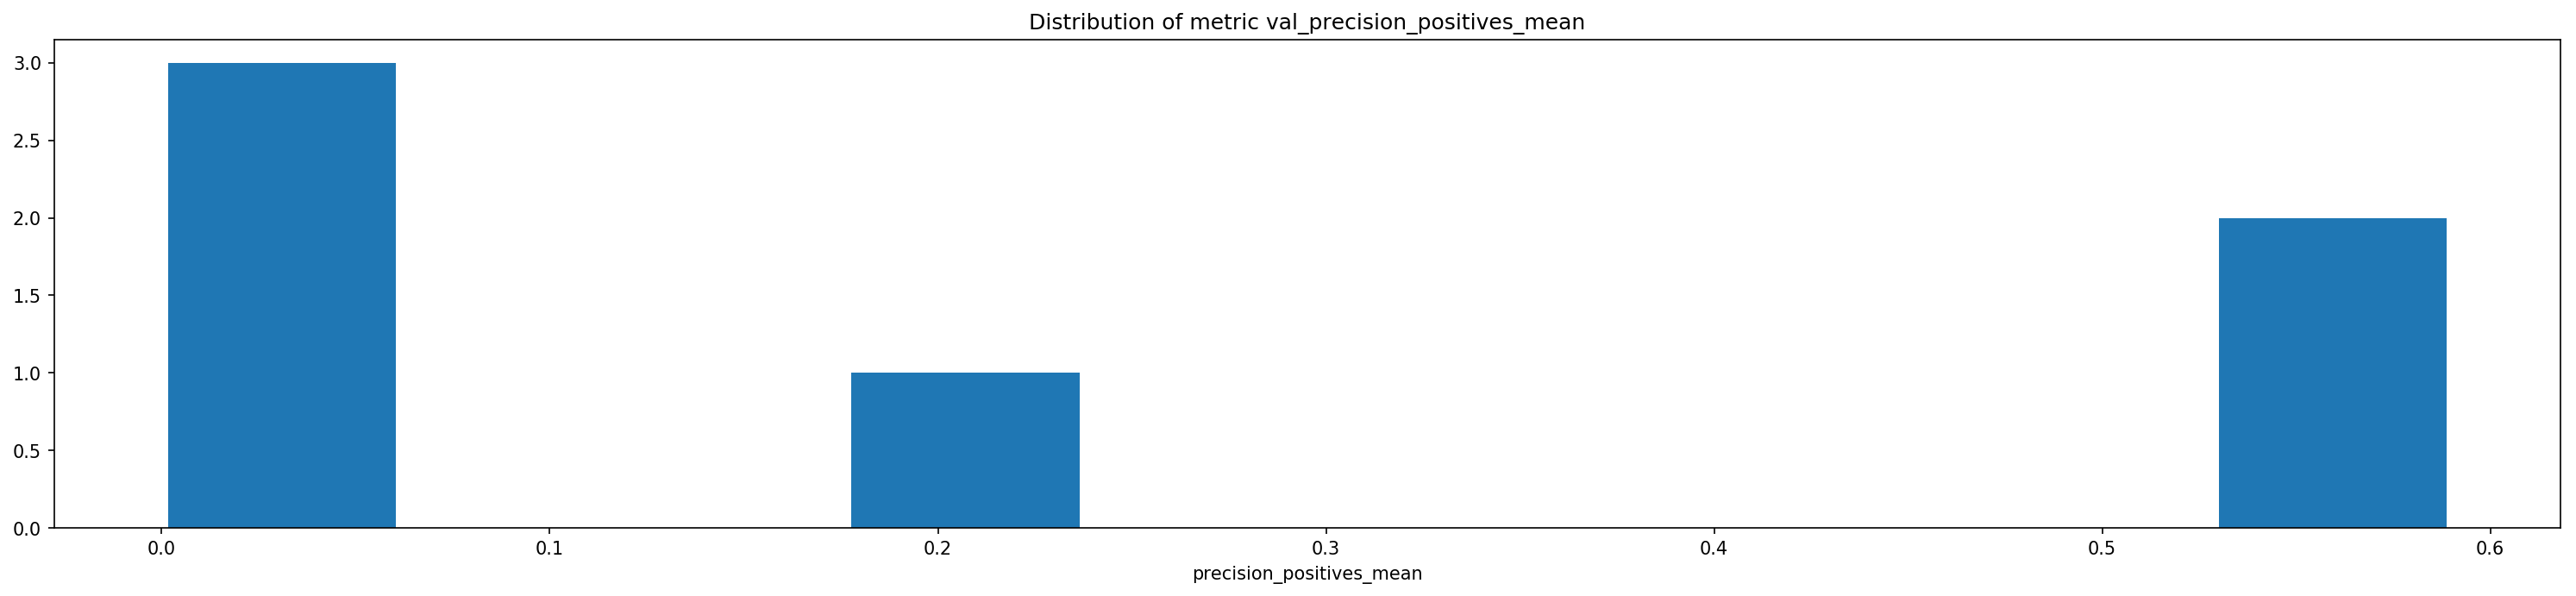

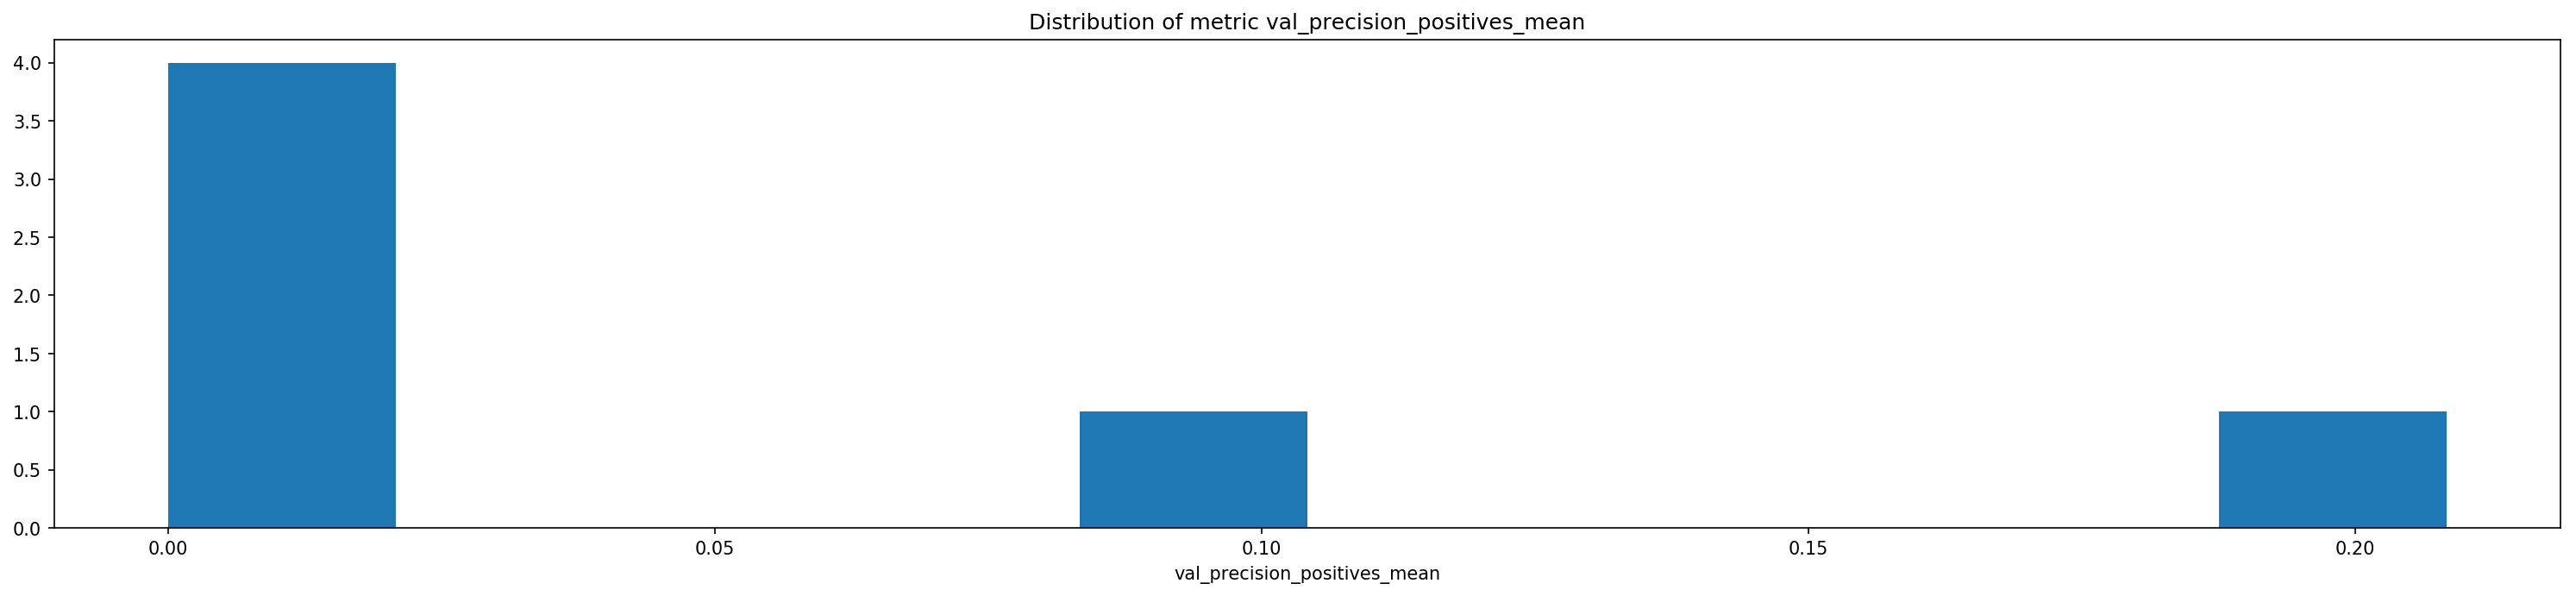

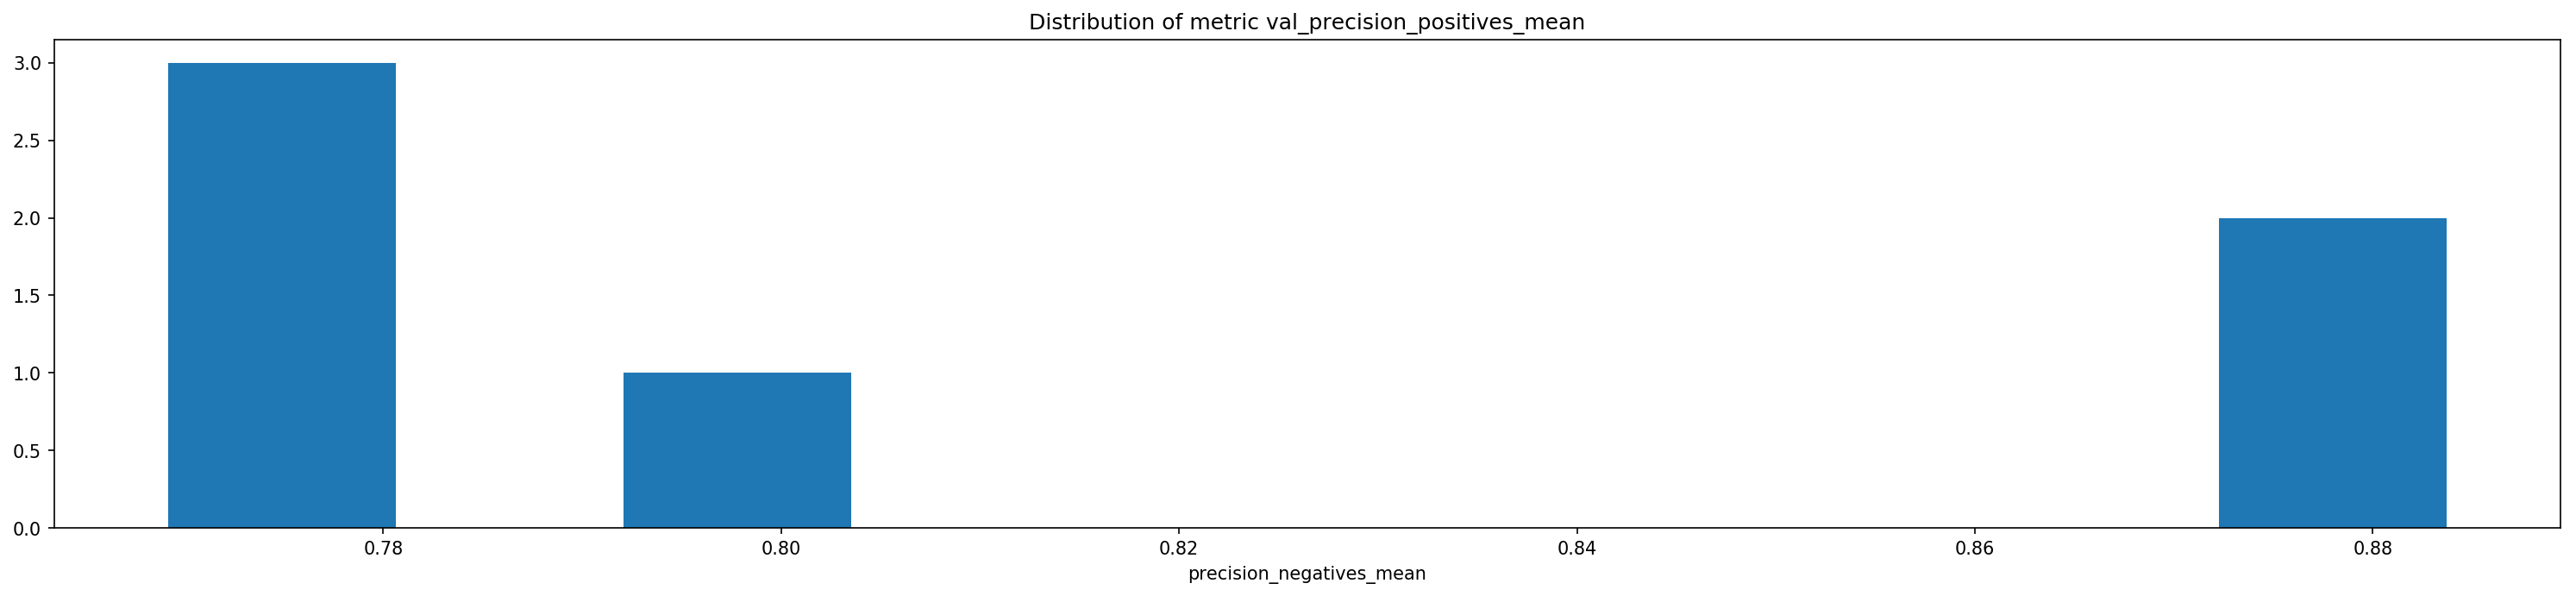

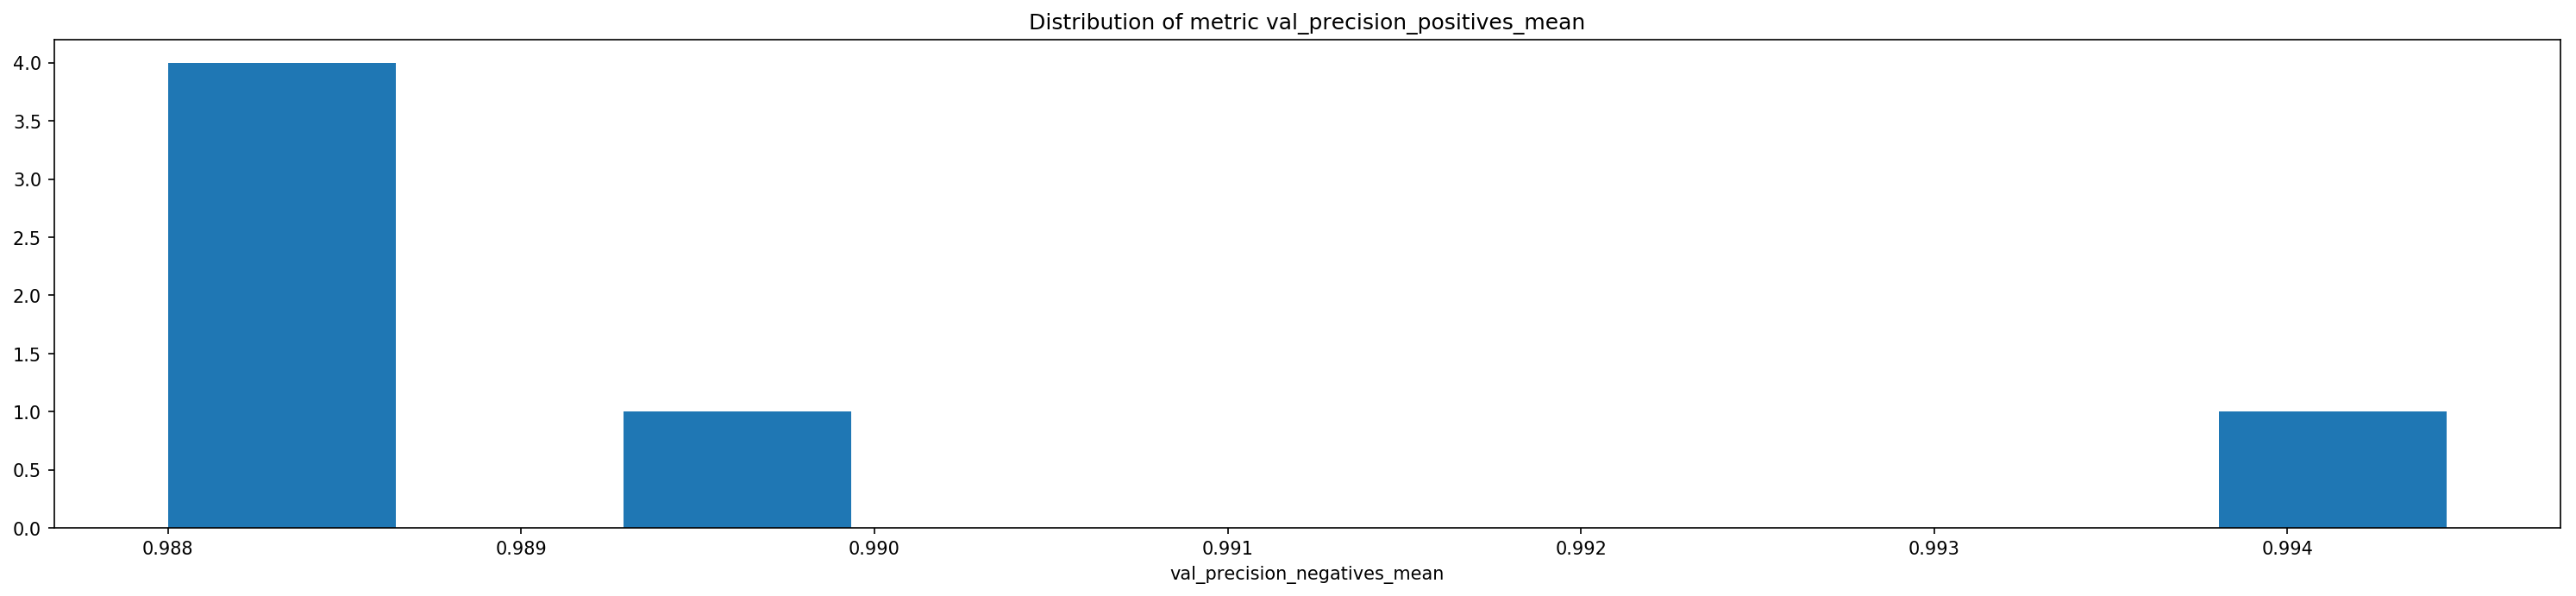

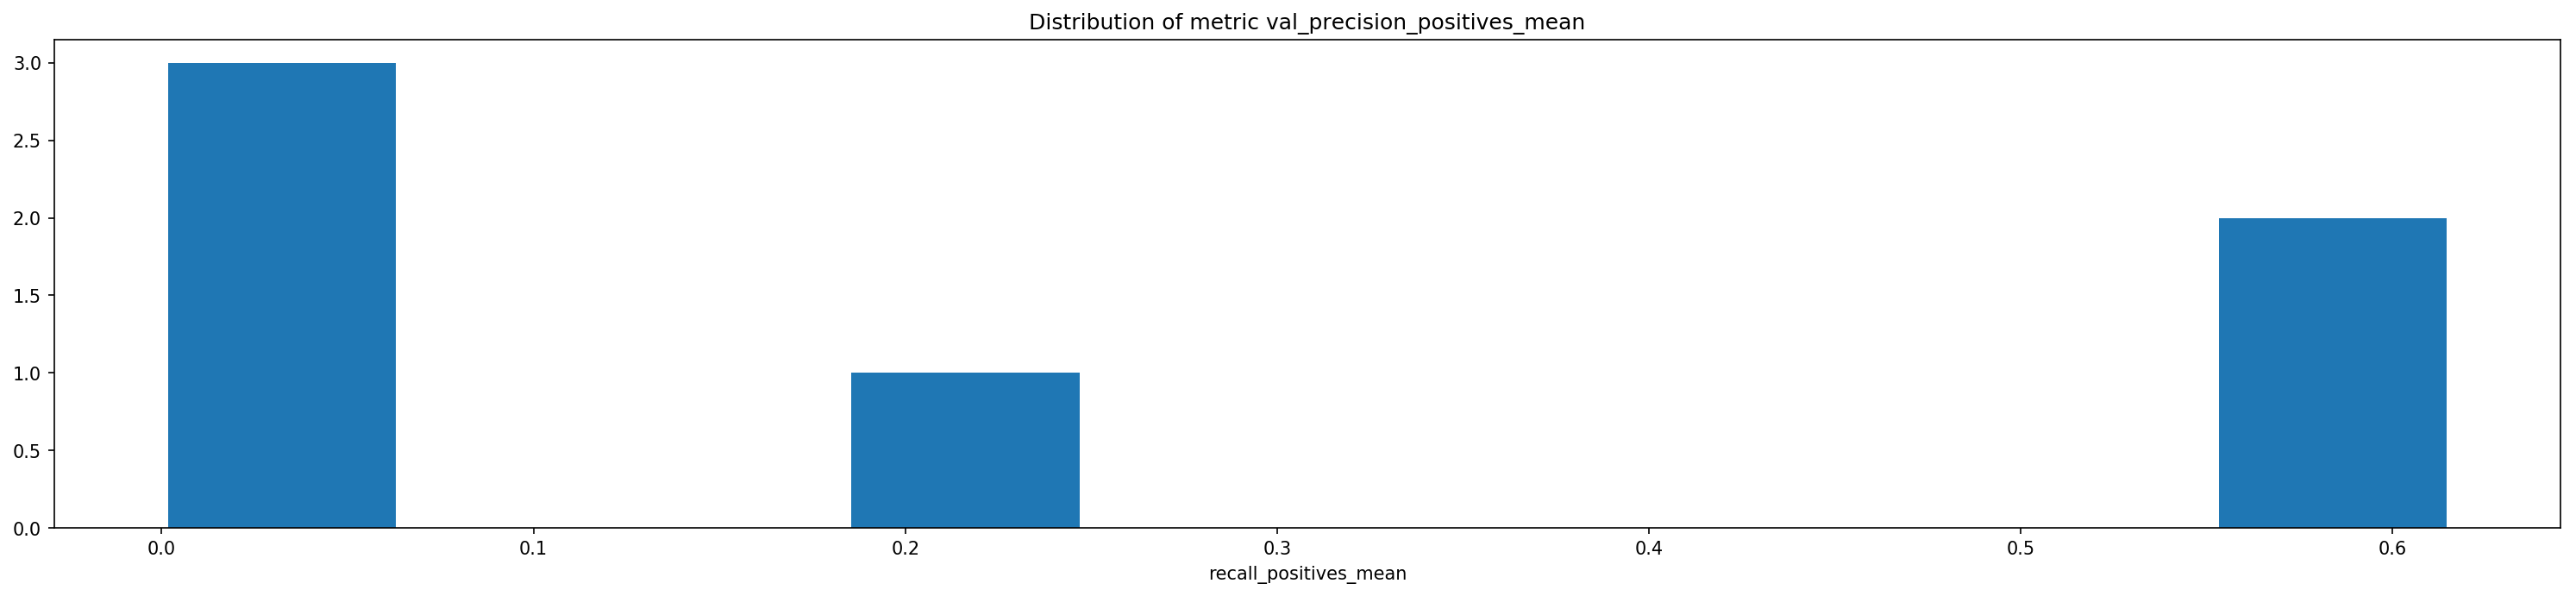

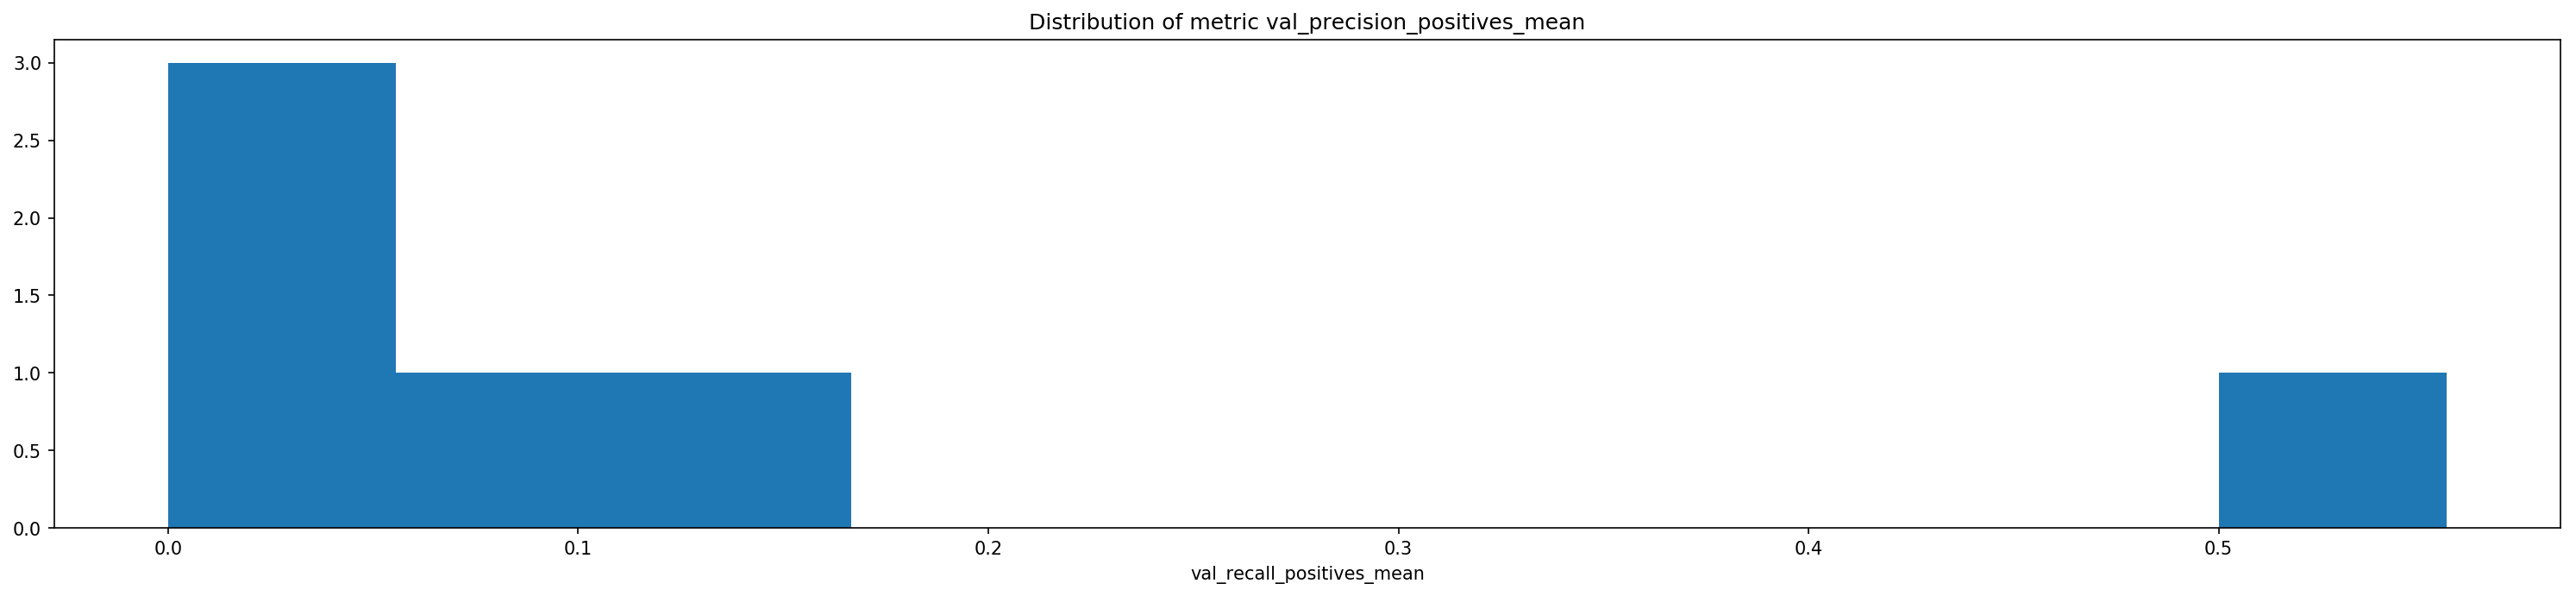

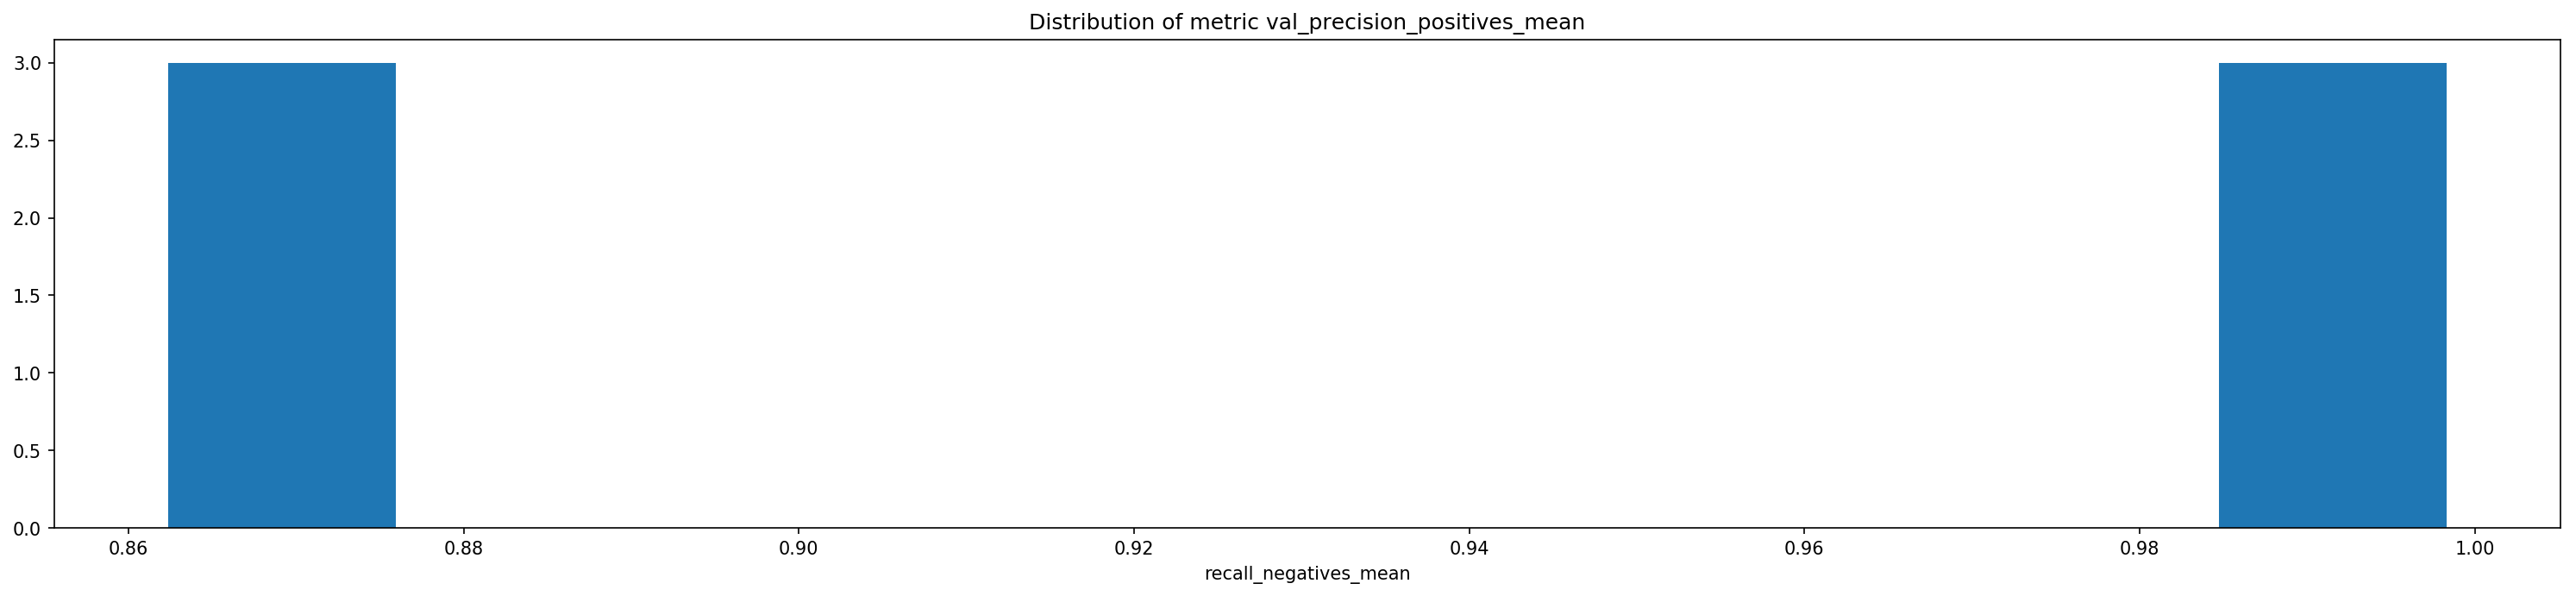

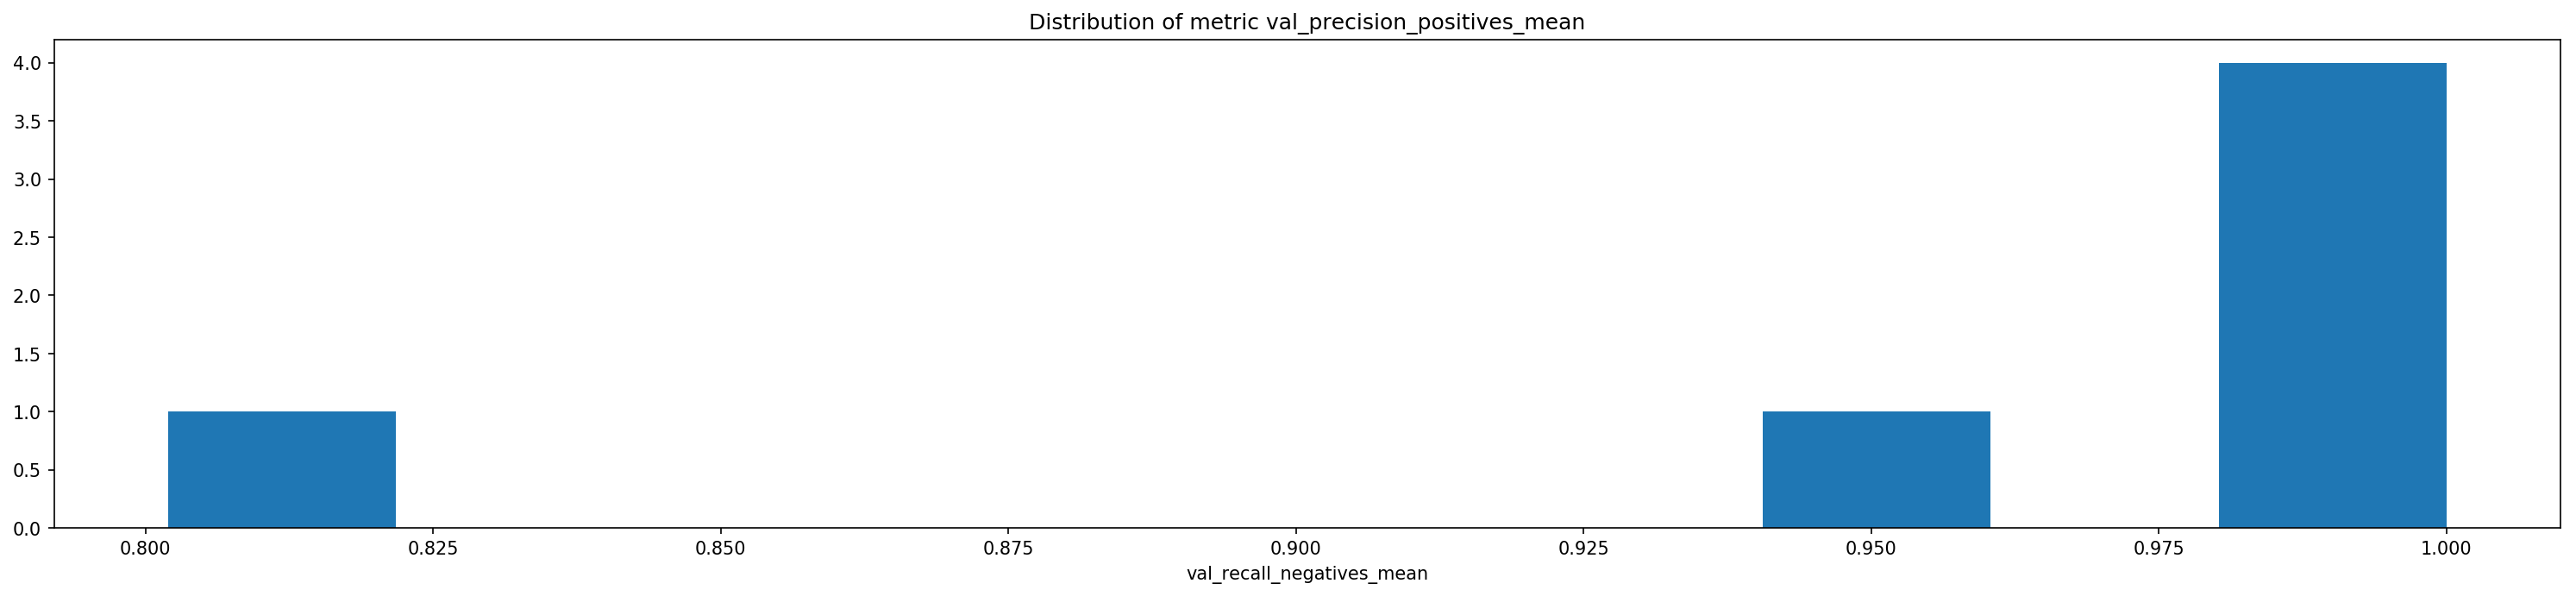

In [17]:
for _metric in metrics:
    fig, ax = plt.subplots(figsize=(25, 5))
    ax.hist(experiments[_metric].dropna())
    ax.set_xlabel(_metric)
    ax.set_title(f'Distribution of metric {metric}')

In [19]:
experiments[metrics+['log']]

,loss_mean,val_loss_mean,precision_positives_mean,val_precision_positives_mean,precision_negatives_mean,val_precision_negatives_mean,recall_positives_mean,val_recall_positives_mean,recall_negatives_mean,val_recall_negatives_mean,log
datetime,,,,,,,,,,,
2019-06-19 15:52:46,0.284252,0.470059,0.001633,0.000000,0.769183,0.988000,0.001709,0.000000,0.998315,1.000000,NaN
2019-06-19 00:25:31,0.216442,0.142233,0.587509,0.208333,0.883700,0.988635,0.614495,0.055556,0.862363,0.997807,NaN
2019-06-19 01:56:49,0.287487,0.508483,0.002145,0.000000,0.769343,0.988000,0.002345,0.000000,0.997671,1.000000,NaN
2019-06-19 14:03:34,0.296561,0.454203,0.004820,0.000000,0.769627,0.988000,0.004615,0.000000,0.995335,1.000000,NaN
2019-06-18 21:40:12,0.235912,1.188398,0.588727,0.097298,0.877005,0.994450,0.585543,0.555556,0.871883,0.801957,NaN
2019-06-18 21:02:07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Resources exhausted
2019-06-17 22:55:34,1.590767,0.582211,0.210222,0.019785,0.792685,0.989655,0.230416,0.166667,0.871191,0.949798,NaN


In [25]:
experiments.loc[experiments['val_precision_positives_mean']< 0.05, 'space'].tolist()

[{'class_weight': {0: 0.345, 1: 0.655},
  'batch_size': 30,
  'layer_type': 'vgg',
  'convolutional_layers': [{'dropout': 0.8,
    'activation': 'softmax',
    'kernel_size': [7, 7],
    'filters': 32,
    'pool_size': [6, 6]},
   {'dropout': 0.8,
    'activation': 'softmax',
    'kernel_size': [7, 7],
    'filters': 64,
    'pool_size': [6, 6]},
   {'dropout': 0.8,
    'activation': 'softmax',
    'kernel_size': [7, 7],
    'filters': 128,
    'pool_size': [6, 6]},
   {'dropout': 0.8,
    'activation': 'softmax',
    'kernel_size': [7, 7],
    'filters': 256,
    'pool_size': [6, 6]}],
  'dense_units': 32,
  'epochs': 12},
 {'class_weight': {0: 0.345, 1: 0.655},
  'batch_size': 30,
  'layer_type': 'cnn',
  'convolutional_layers': [{'dropout': 0.8,
    'activation': 'softmax',
    'kernel_size': [5, 5],
    'filters': 64,
    'pool_size': [4, 4]},
   {'dropout': 0.8,
    'activation': 'softmax',
    'kernel_size': [5, 5],
    'filters': 128,
    'pool_size': [4, 4]}],
  'dense_units': 